<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/06_Image_Compositions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#@title
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

sns.set_theme()
sns.set_style("whitegrid")
sns.set_style("ticks")

def summary(image):
	if image.ndim == 2:
		SUM = ('\n{0:>10s}: {1:>15.4f}').format('min', np.amin(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('1st Quar', np.percentile(image, 25))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('median', np.median(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('mean', np.mean(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('3rd Quar', np.percentile(image, 75))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('max', np.amax(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('sigma', np.std(image))
	elif image.ndim == 3:
		R = image[:,:,0]
		G = image[:,:,1]
		B = image[:,:,2]
		SUM = ('{0:>%ss} {1:>%ss} {2:>%ss}' % (27, 15, 15)).format('R', 'G', 'B')
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('min', np.amin(R), np.amin(G), np.amin(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('1st Quar', np.percentile(R, 25), np.percentile(G, 25), np.percentile(B, 25))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('median', np.median(R), np.median(G), np.median(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('mean', np.mean(R), np.mean(G), np.mean(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('3rd Quar', np.percentile(R, 75), np.percentile(G, 75), np.percentile(B, 75))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('max', np.amax(R), np.amax(G), np.amax(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('sigma', np.std(R), np.std(G), np.std(B))
	else:
		raise ValueError('Invalid argument! It is not an image..')
	print(SUM)

def histogram(image, **kwargs):
	x, y = (3*(256 + 100), 256) if 'dims' not in kwargs else kwargs['dims']
	dpi = 72 if 'dpi' not in kwargs else kwargs['dpi']
	bins = 256 if 'bins' not in kwargs else kwargs['bins']
	rw = 0.95 if 'rw' not in kwargs else kwargs['rw']
	interval = [0, 255] if 'interval' not in kwargs else kwargs['interval']

	fig = plt.figure(figsize=(x/dpi, y/dpi))
	
	gs1 = gridspec.GridSpec(1, 3)
	gs1.update(	left=0,
				right=1,
				bottom=0,
				top=1,
				wspace=0,
				hspace=0)
	ax1 = plt.subplot(gs1[:, 0])
	ax1.axis('off')
	ax2 = plt.subplot(gs1[:, 1:])

	img = image.copy()

	if img.ndim == 2:
		ax1.imshow(	img,
					cmap='gray',
					vmin=interval[0],
					vmax=interval[1])
		ax2.hist(	img.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					color='k')
	elif img.ndim == 3:
		imgo = (img - interval[0])/(interval[1] - interval[0])
		imgo[imgo < 0] = 0
		imgo[imgo > 1] = 1

		R = img[:,:,0]
		G = img[:,:,1]
		B = img[:,:,2]

		ax1.imshow(imgo);
		ax2.hist(	R.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(1, 0, 0.0, 0.7))
		ax2.hist(	G.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(0.0, 1, 0, 0.7))
		ax2.hist(	B.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(0, 0.0, 1, 0.7))
	else:
		raise ValueError('Invalid argument! It is not an image..')
	plt.show()

def panel(images, gspec, **kargs):
	M, N = gspec

	x, y = (1024, 512) if 'dims' not in kargs else kargs['dims']
	dpi = 72 if 'dpi' not in kargs else kargs['dpi']
	texts = [] if 'texts' not in kargs else kargs['texts']
	tx, ty = (10, 10) if 'text_pos' not in kargs else kargs['text_pos']
	tc = 'white' if 'text_color' not in kargs else kargs['text_color']
	ts = 12 if 'text_size' not in kargs else kargs['text_size']
	interval = [0, 255] if 'interval' not in kargs else kargs['interval']

	fig = plt.figure(figsize=(x/dpi, y/dpi))
	gs = gridspec.GridSpec(N, M)
	gs.update(	left=0, right=1,
                bottom=0, top=1,
                wspace=0, hspace=0)
	images = (images - interval[0])/(interval[1] - interval[0])
	images[images < 0] = 0
	images[images > 1] = 1
	for n in range(N):
		for m in range(M):
			ax = plt.subplot(gs[n, m])
			ax.axis('off')
			try:
				image = images[n*M + m]
			except:
				image = images[0]*0
			if image.ndim == 2:
				ax.imshow(image, cmap='gray')
			else:
				ax.imshow(image)
			try:
				text = texts[n*M + m]
			except:
				text = ''
			ax.text(	tx, ty, text,
						color=tc, size=ts,
						horizontalalignment='left',
						verticalalignment='top')
	plt.show()

<a name="tartalom"></a>

# Kép kompozicíós módok
---
Két kép kombinációjának módjai, legalábbis azok amelyekről olvastam - vázlat nincs készen

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import imageio
import skimage
import skimage.io

import warnings
warnings.filterwarnings('ignore')

## 0. Képek betöltése és normalizálás [0,1] tartományba
---
$A$ és $B$ (*sRGB*) képek .

*minden egyes kép képpontintenzitását 0-1 tartományba transponálom, akár szürkeárnyalatos, akár színes*

Minden math műveletet Numpy tömbként végzek el.

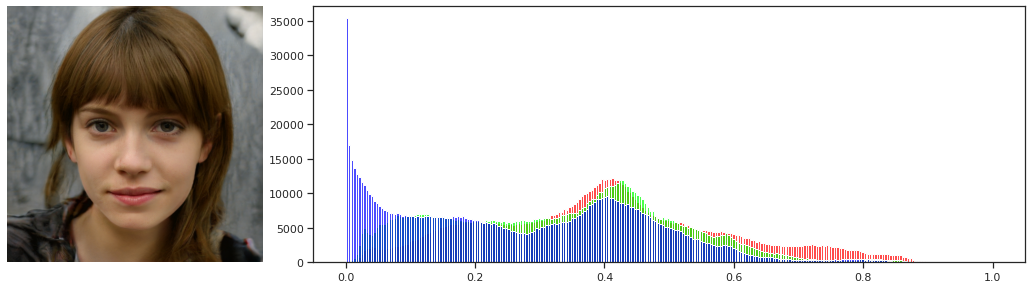

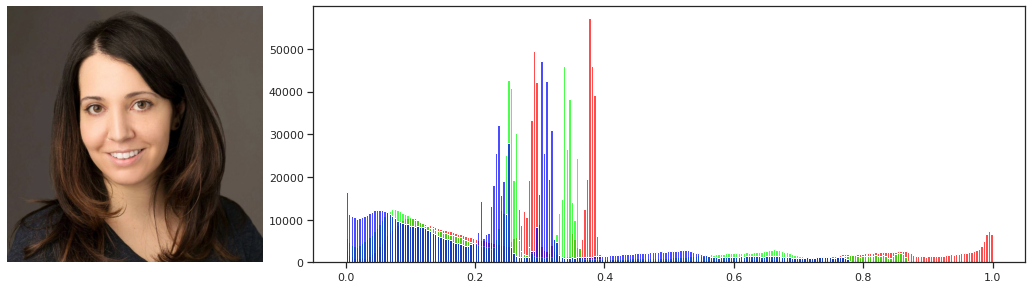

In [58]:
# Képek betöltése és normalizálása [0, 1]
A = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')/255
histogram(A, bins=2**8, interval=[0, 1])

B = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman3.jpg?raw=true')/255
histogram(B, bins=2**8, interval=[0, 1])


## 1. Egy alpha és egy beta jelölésű mátrixunk lesz ezeket fogom később felhasználni
---

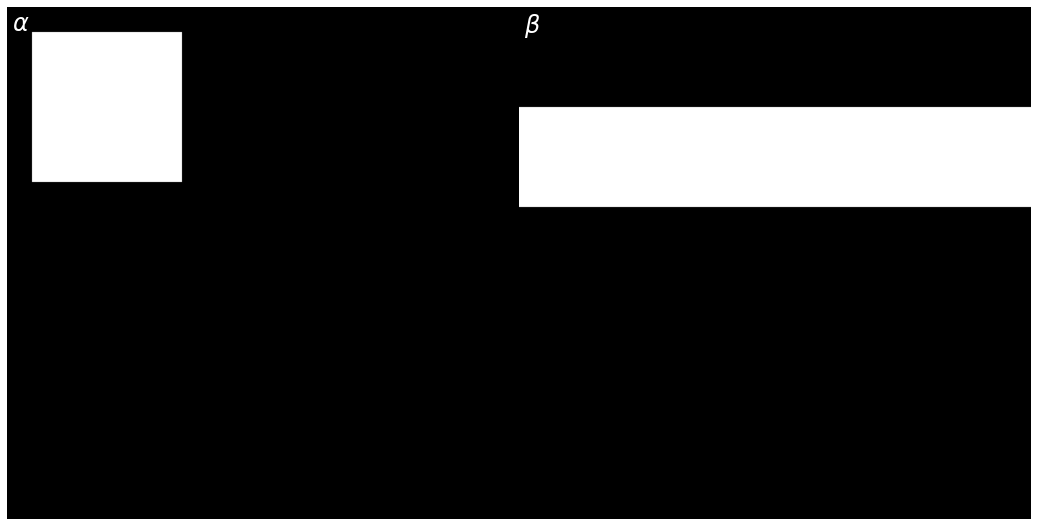

In [84]:
n1, n2, _ = A.shape
a = np.zeros((n1, n2, 1))
a[50:350, 50:350] = 1

n1, n2, _ = B.shape
b = np.zeros((n1, n2, 1))
b[200:400] = 1

panel(
    np.array([a[...,0], b[...,0]]), [2, 1],
    text_size=24, text_color='white',
    texts=[r'$\alpha$', r'$\beta$']
)

a.type  =  <class 'numpy.ndarray'>
a.shape =  (1024, 1024, 1)
a.min   =  0.0
a.max   =  1.0


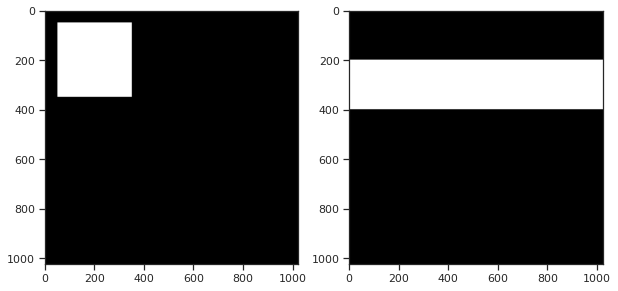

In [104]:
print('a.type  = ', type(a))
print('a.shape = ', a.shape)
print('a.min   = ', a.min())
print('a.max   = ', a.max())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.imshow(a[:,:,0], cmap = 'gray')
ax2.imshow(b[:,:,0], cmap = 'gray')
plt.show()


### 1.1. Over
---
$$ \large
O = A\alpha+B(1-\alpha)
$$

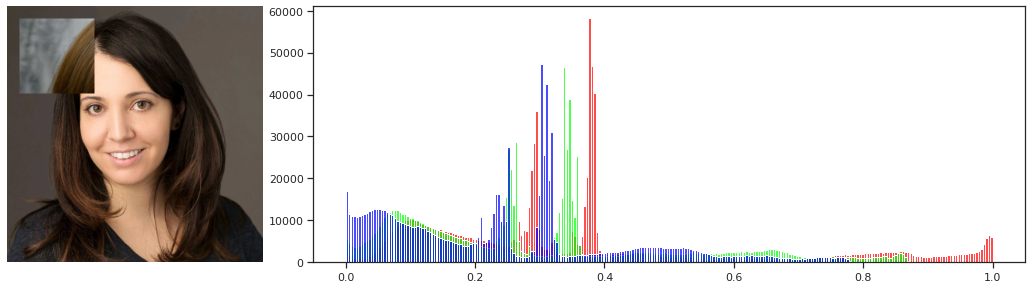

In [105]:
O = A*a + B*(1 - a)
histogram(O, bins=2**8, interval=[0, 1])

### 1.2. Atop
---
$$ \large
O = A\beta+B(1-\alpha)
$$

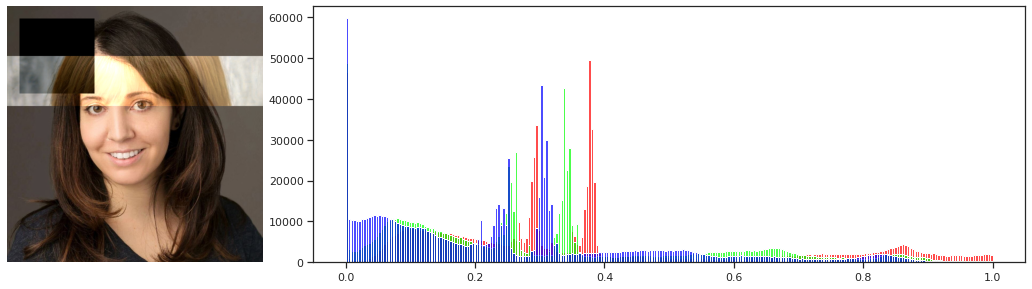

In [61]:
O = A*b + B*(1 - a)
histogram(O, bins=2**8, interval=[0, 1])

### 1.3. Conjoint over
---
$$ \large
O =
\begin{cases}
    A &, \text{ha } \alpha > \beta \\
    A+\frac{B(1-\alpha)}{\beta} &, \text{ }
\end{cases}
$$

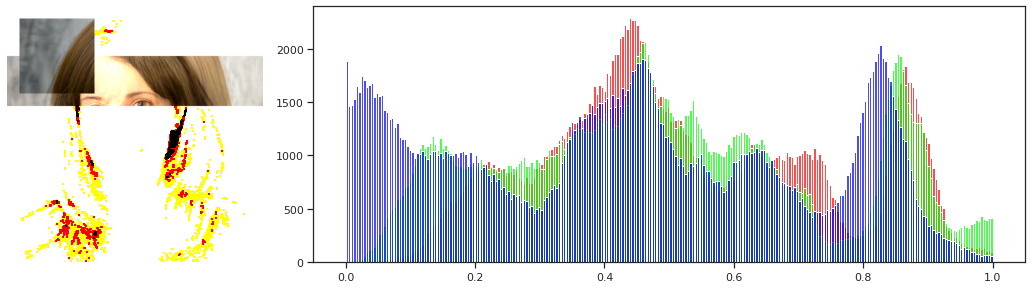

In [62]:
O = A + B*(1 - a)/b
cond = (a > b)[...,0]
O[cond] = A[cond]
histogram(O, bins=2**8, interval=[0, 1])

### 1.4. Disjoint over
---
$$ \large
O =
\begin{cases}
    A+B &, \text{ha } \alpha+\beta < 1 \\
    A+\frac{B(1-\alpha)}{\beta} &, \text{ }
\end{cases}
$$

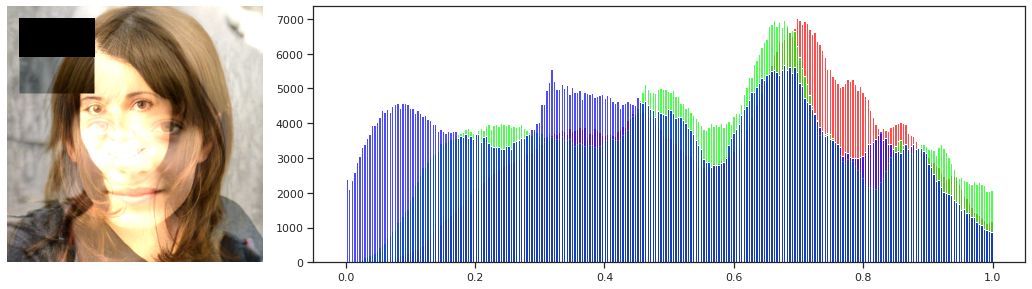

In [63]:
O = A + B*(1 - a)/b
cond = ((a + b) < 1)[...,0]
O[cond] = (A + B)[cond]
histogram(O, bins=2**8, interval=[0, 1])

### 1.5. In
---
$$ \large
O = A\beta
$$

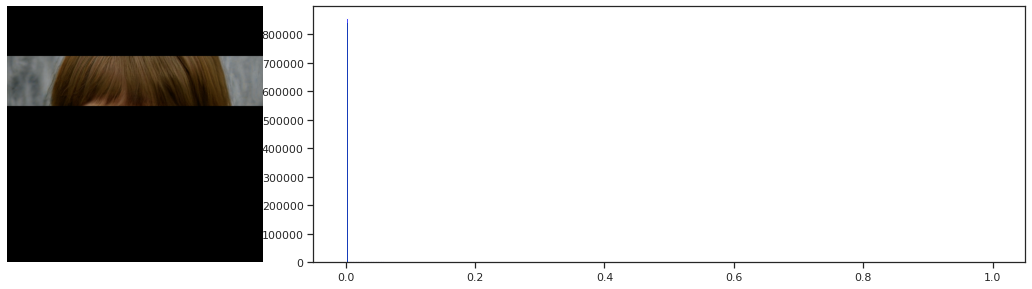

In [64]:
O = A*b
histogram(O, bins=2**8, interval=[0, 1])

### 1.6. Xor
---
$$ \large
O = A(1 - \beta) + B(1 - \alpha)
$$

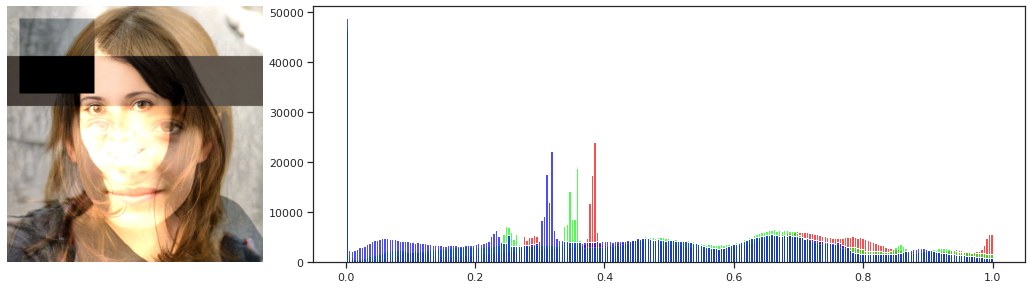

In [65]:
O = A*(1 - b) + B*(1 - a)
histogram(O, bins=2**8, interval=[0, 1])

## 2. Blend modes
---


In [106]:
# Gamma
g = 2.2

# Gamma corrected
A_, B_ = A**g, B**g

### 2.1. Average
---
$$ \large
O' = \frac{A'+B'}{2}
$$

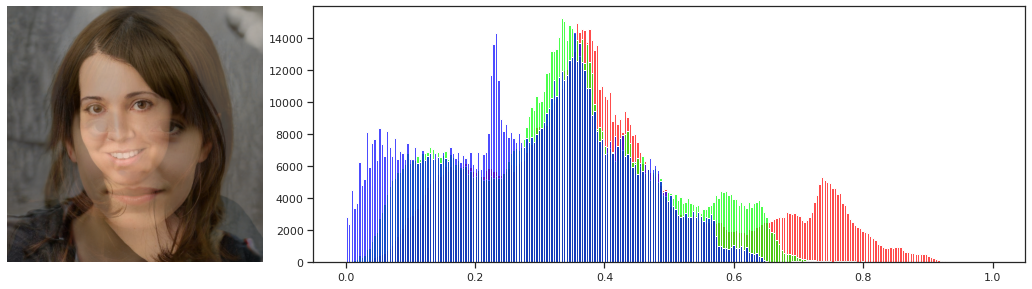

In [107]:
O = (A_ + B_)/2
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.2. Color burn
---
$$ \large
O' = 1 - \frac{1-B'}{A'}
$$

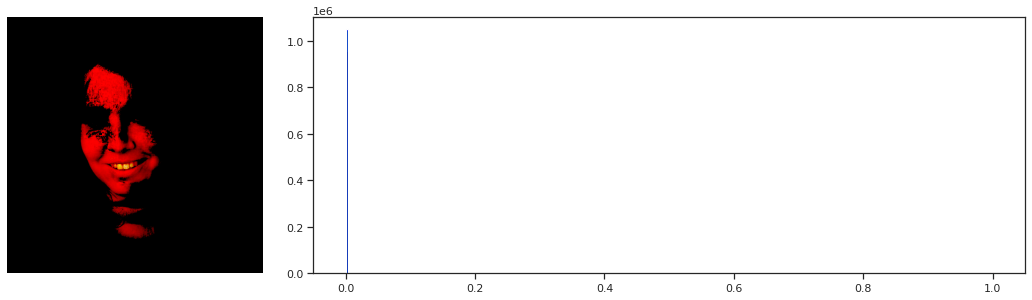

In [68]:
O = 1 - (1 - B_)/A_

# Nullával való osztáshoz
O[O < 0] = 0
O[O > 1] = 1

histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.4. Difference
---
$$ \large
O' = |A'-B'|
$$

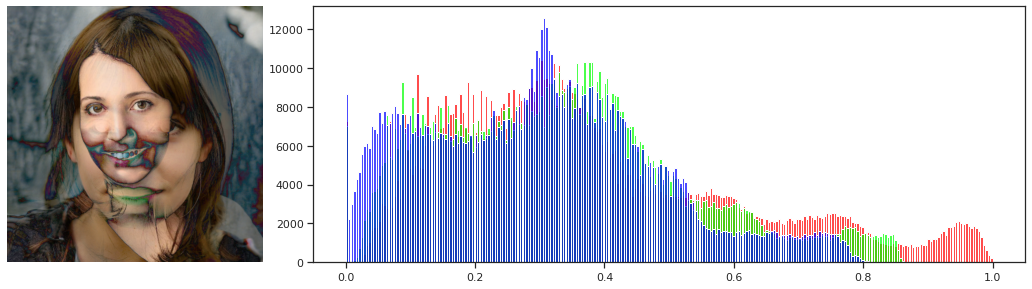

In [69]:
O = np.absolute(A_ - B_)
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.5. Division
---
$$ \large
O' = \frac{A'}{B'}
$$

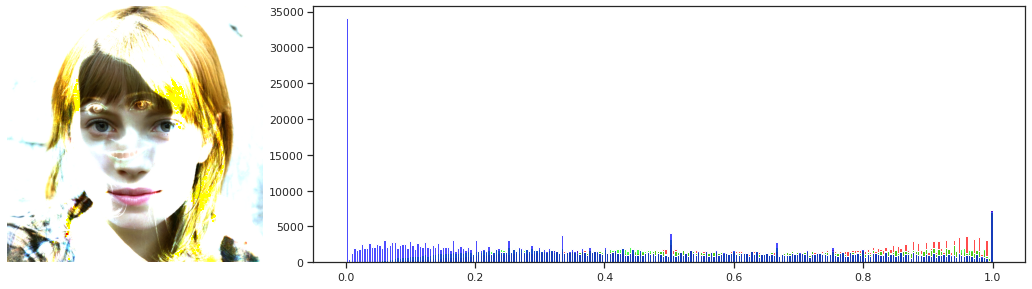

In [70]:
O = A_/B_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.6. Exclusion
---
$$ \large
O' = A'+B'-2A'B'
$$

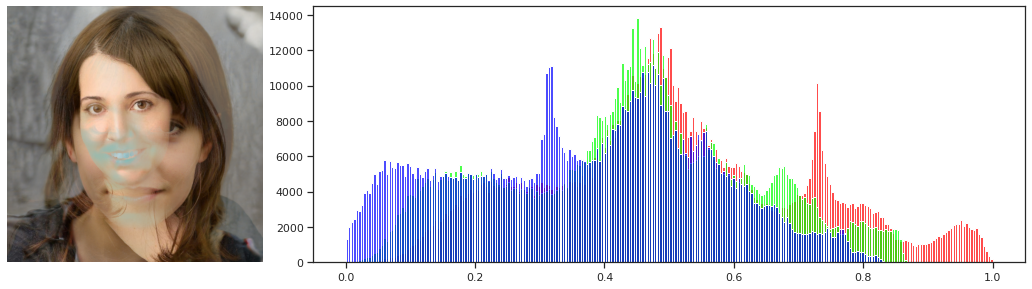

In [71]:
O = A_ + B_ - 2*A_*B_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.7. From
---
$$ \large
O' = B'- A'
$$

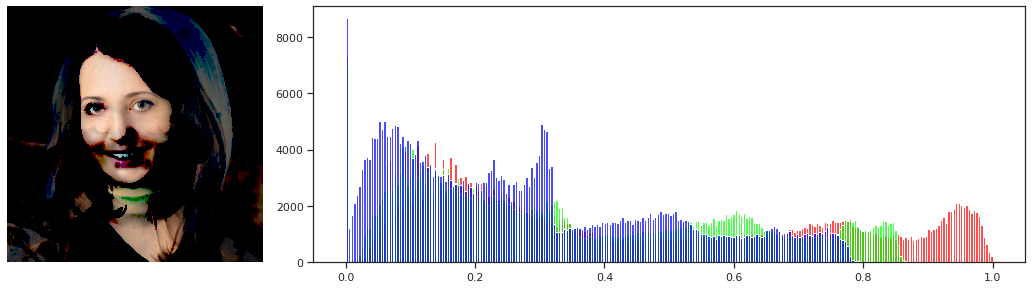

In [72]:
O = B_ - A_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.8. Geometric
---
$$ \large
O' = \frac{2A'B'}{A'+B'}
$$

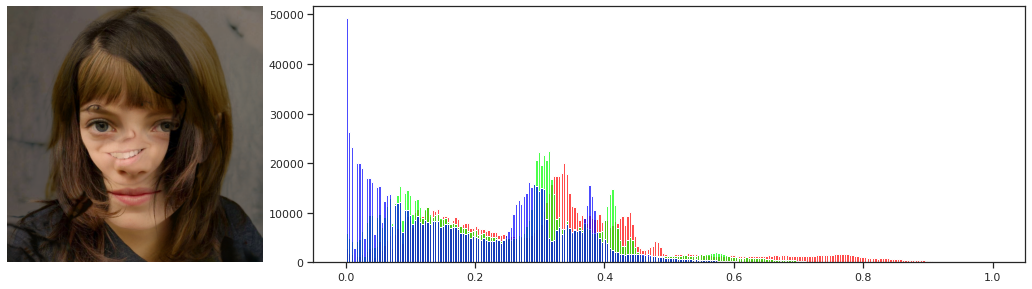

In [73]:
O = 2*A_*B_/(A_ + B_)
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.9. Hypot
---
$$ \large
O' = \sqrt{A'^2+B'^2}
$$

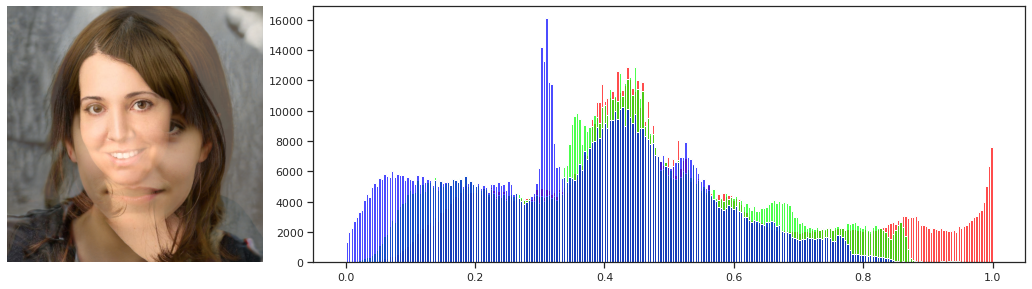

In [74]:
O = (A_**2 + B_**2)**0.5
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.10. Max
---
$$ \large
O' = \max(A', B')
$$

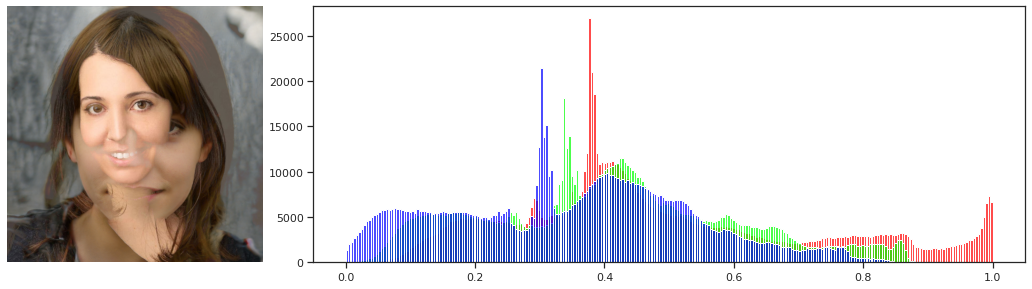

In [75]:
O = np.maximum(A_, B_)
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.11. Min
---
$$ \large
O' = \min(A', B')
$$

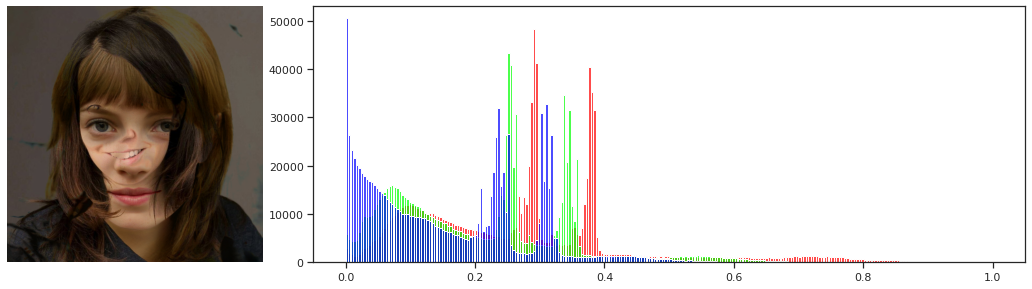

In [76]:
O = np.minimum(A_, B_)
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.12. Minus
---
$$ \large
O' = A'- B'
$$

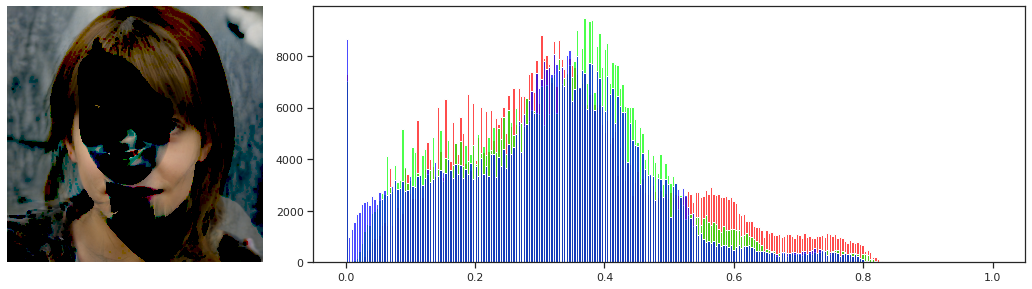

In [77]:
O = A_ - B_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.13. Multiply
---
$$ \large
O' = A'B'
$$

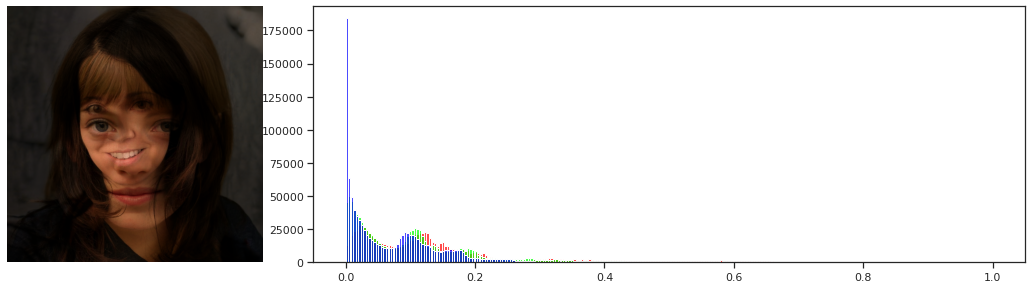

In [78]:
O = A_*B_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.14. Plus
---
$$ \large
O' = A' + B'
$$

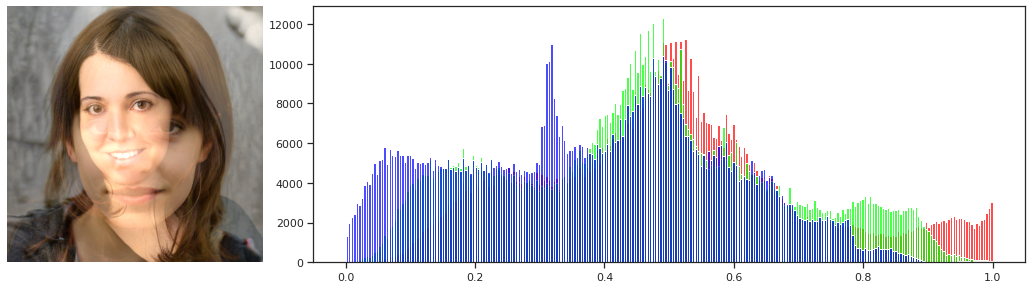

In [79]:
O = A_ + B_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.15. Screen
---
$$ \large
O' = A' + B' - A'B'
$$

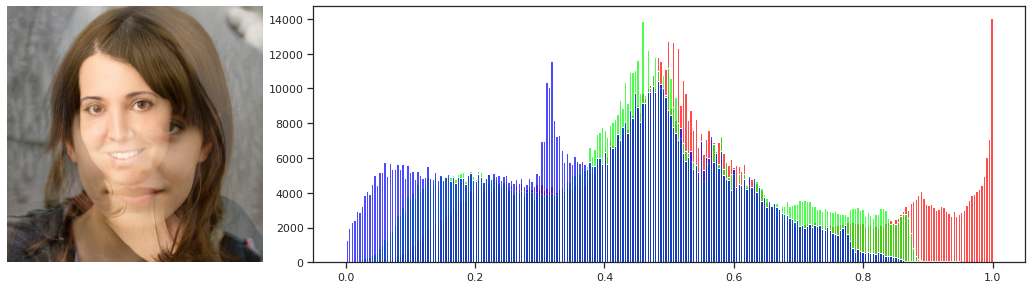

In [80]:
O = A_ + B_ - A_*B_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.16. Soft light
---
$$ \large
O' = B'(2A' + B'(1 - A'B'))
$$

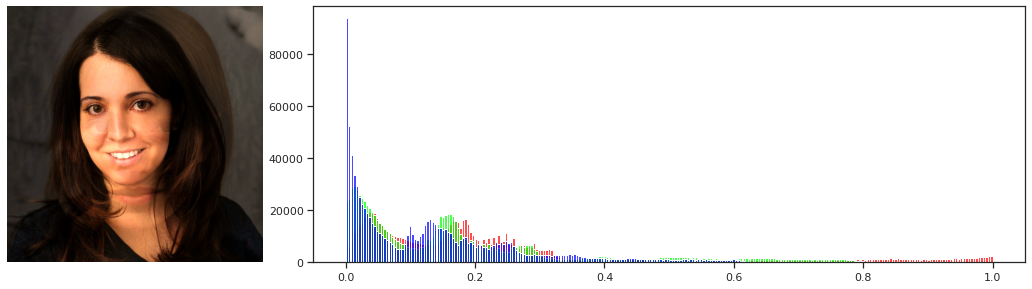

In [81]:
O = B_*(2*A_ + B_*(1 - A_*B_))
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.17. Hard light
---
$$ \large
O' =
\begin{cases}
    \text{multiply}&, \text{ha } A < \frac{1}{2} \\
    \text{screen}&, \text{ }
\end{cases}
$$

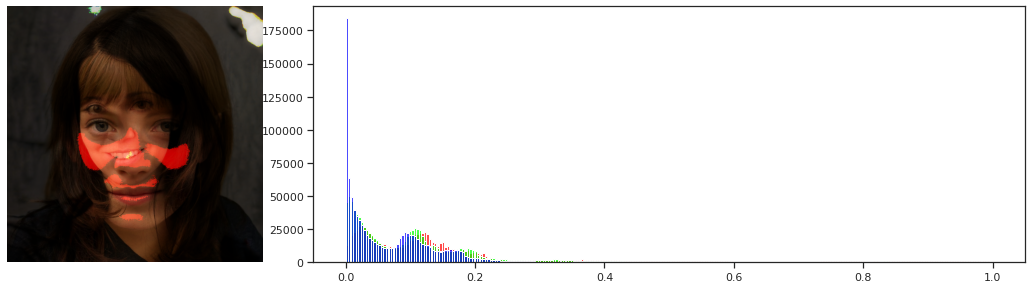

In [82]:
O = A_ + B_ - A_*B_
cond = A_ < 0.5
O[cond] = (A_*B_)[cond]
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.18. Overlay
---
$$ \large
O' =
\begin{cases}
    \text{multiply}&, \text{ha } B < \frac{1}{2} \\
    \text{screen}&, \text{ }
\end{cases}
$$

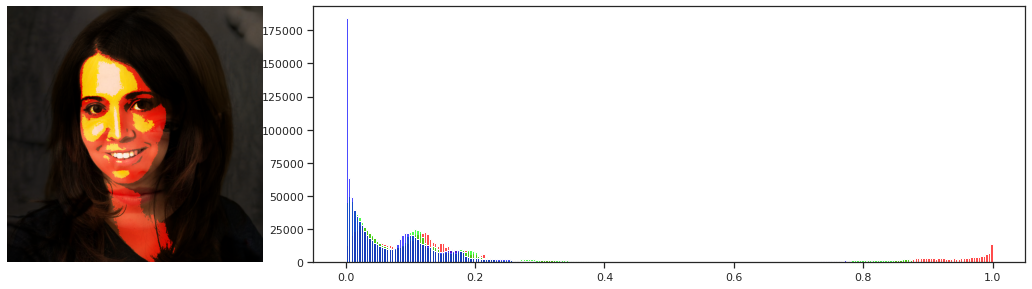

In [83]:
O = A_ + B_ - A_*B_
cond = B_ < 0.5
O[cond] = (A_*B_)[cond]
histogram(O**(1/g), bins=2**8, interval=[0, 1])


<a name="felhasznalt-irodalom"></a>

[vissza a tartalomhoz](#tartalom)

<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## Felhasznált irodalom és internetes cimek <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

Adobe Photoshop - Blending mode explained
<br>
https://photoshoptrainingchannel.com/blending-modes-explained/

Digitális képfeldolgozás gyakorlat - Szegedi Tudományegyetem, Természettudományi és Informatikai Kar - Németh Gábor
<br>
https://www.inf.u-szeged.hu/~gnemeth/kurzusok/kepfel1/2015/gyak03/intenzits_transzformcik1.html

Wikipedia - 'Color Theory'
<br>
https://en.wikipedia.org/wiki/Color_theory


------------

[1]
Cornell University - 'Grayscale'
<br>
http://www.plantpath.cornell.edu/PhotoLab/KnowledgeBase/DigiPhotoTips/Grayscale.htm

[2]
The Deep Dive on Bit Depth
<br>
https://www.projectorcentral.com/All-About-Bit-Depth.htm

------------
Structural Medicine - Convolution
<br>
https://www.wikiwand.com/en/Grayscale#


Belgian Earth Observation - Remote sensing images
<br>
https://eo.belspo.be/en/remote-sensing-images
